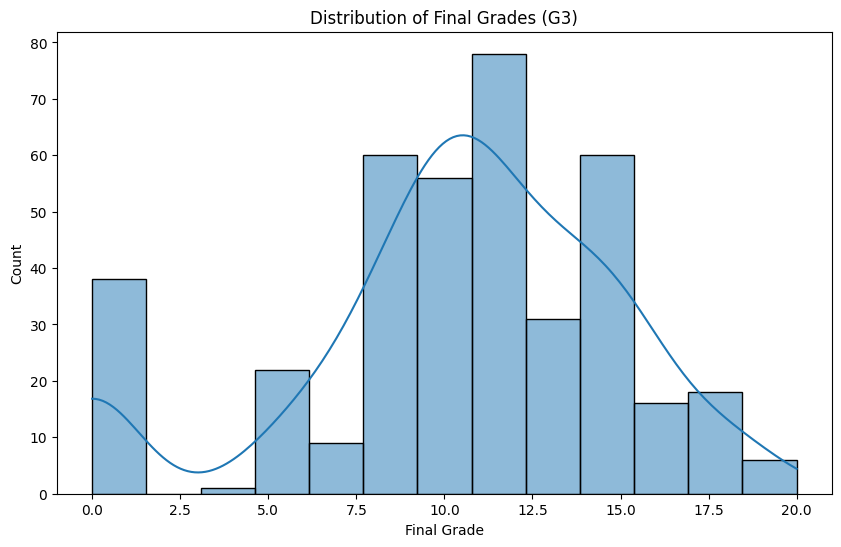

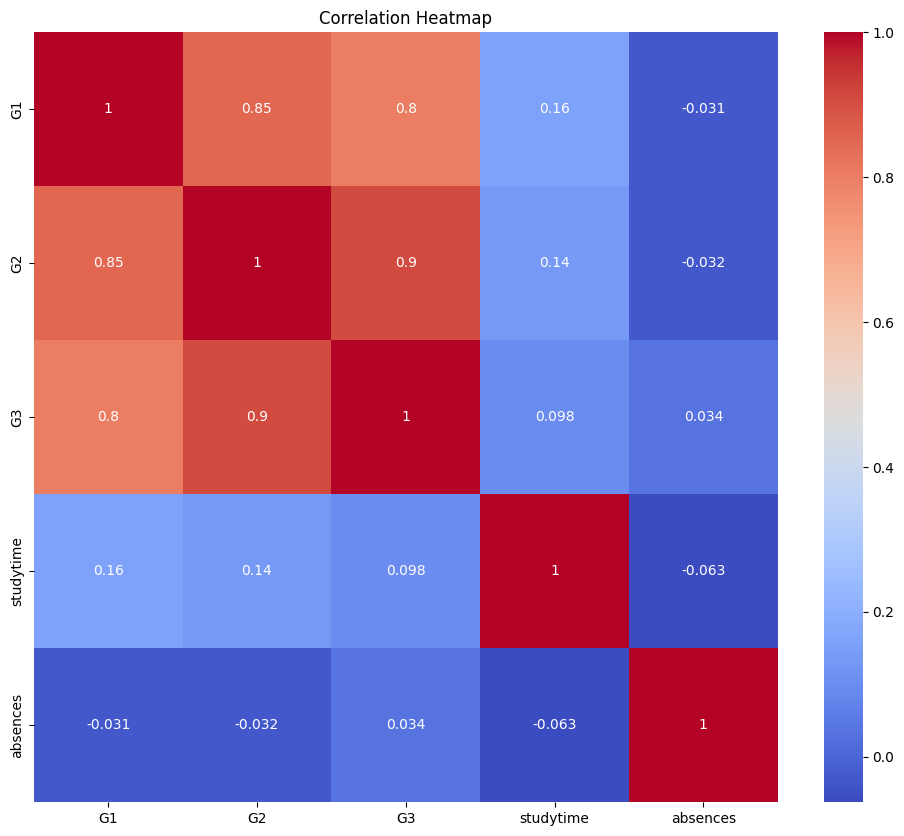

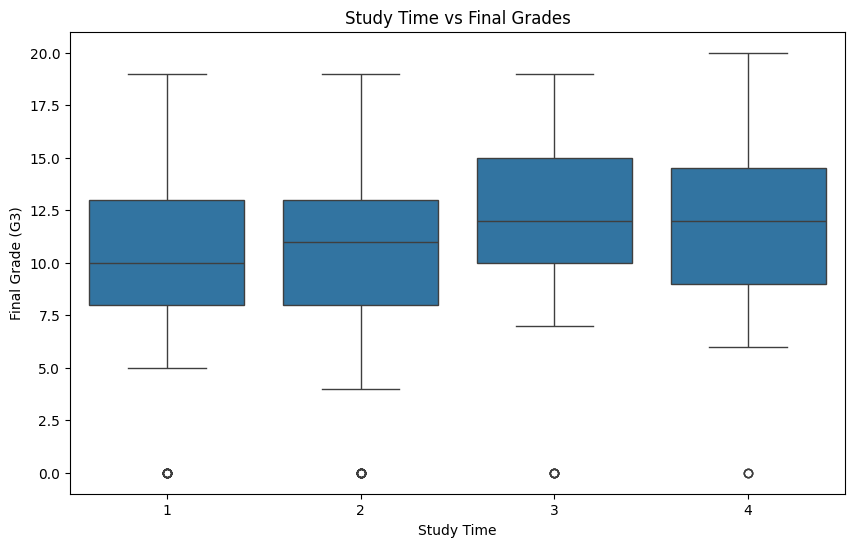

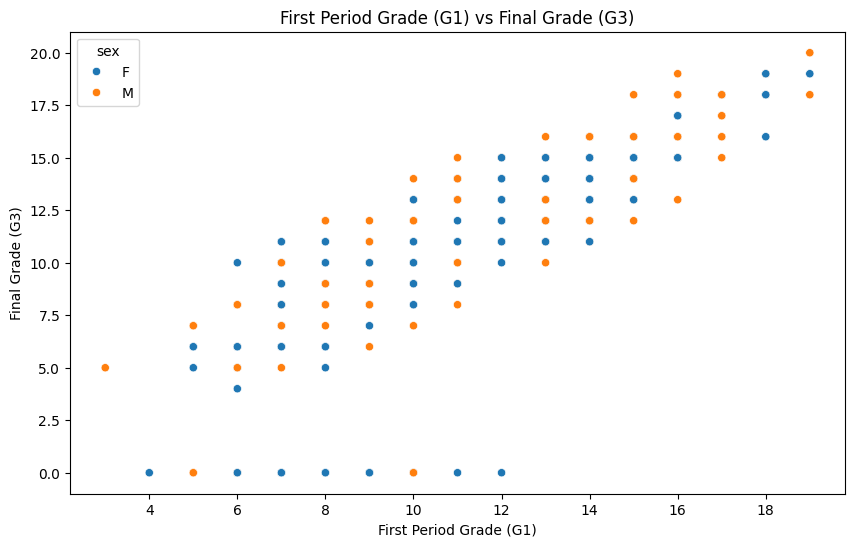

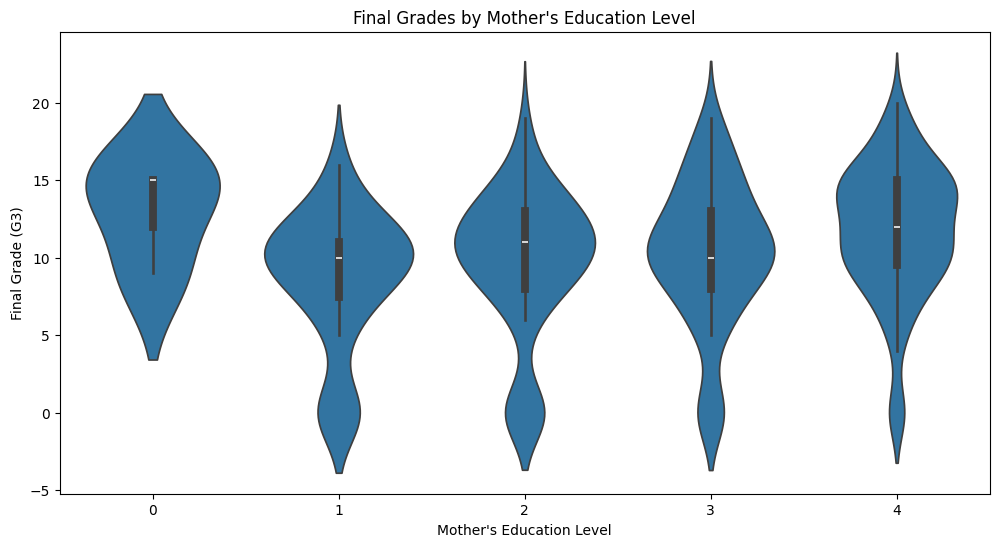

Mean Squared Error: 3.290816964891676
R-squared Score: 0.8395118566726397
Student result: Pass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/student-mat.csv', sep=';')

# Data Visualization

## 1. Distribution of Final Grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='G3', kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

## 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[['G1', 'G2', 'G3', 'studytime', 'absences']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3. Boxplot of Study Time vs Final Grades
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='studytime', y='G3')
plt.title('Study Time vs Final Grades')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

## 4. Scatter Plot of G1 vs G3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='G1', y='G3', hue='sex')
plt.title('First Period Grade (G1) vs Final Grade (G3)')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.show()

## 5. Violin Plot of Final Grades by Parental Education
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Medu', y='G3')
plt.title("Final Grades by Mother's Education Level")
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')
plt.show()

# Prepare data for modeling
X = df[['G1', 'G2', 'studytime', 'absences']]
y = df['G3']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Function to determine pass or fail
def determine_result(G1, G2, studytime, absences):
    # Scale input data using the same scaler
    input_data = scaler.transform([[G1, G2, studytime, absences]])
    prediction = model.predict(input_data)[0]
    return "Pass" if prediction >= 10 else "Fail"

# Example usage
result = determine_result(12, 14, 2, 5)
print(f"Student result: {result}")
